In [1]:
# download and import the latest version of the chant module from IQ's github repository

import sys
# !rm -rf chant
# !git clone https://www.github.com/eyequeue/chant
# sys.path.append('chant')
import chant
import pandas as pd 
import numpy as np
pd.options.display.max_rows = 500

# put all the LMLO data in one dataframe (formerly known as "bigdata" or "bd")
lmlo = chant.cd.merge(chant.nd)

!pip install cltk
import cltk
from cltk.stem.latin.syllabifier import Syllabifier
syllabifier = Syllabifier()


    100% |████████████████████████████████| 614kB 141kB/s ta 0:00:01
    100% |████████████████████████████████| 460kB 174kB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 417kB/s ta 0:00:01
    100% |████████████████████████████████| 1.5MB 443kB/s ta 0:00:01
    100% |████████████████████████████████| 686kB 406kB/s ta 0:00:011
    100% |████████████████████████████████| 471kB 22kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 23kB/s ta 0:00:0101
  Stored in directory: /Users/iq2/Library/Caches/pip/wheels/cb/da/9b/b4a9924af2c345d40e8ea7aea34a05a8f31dbd2f8357126ce3
  Stored in directory: /Users/iq2/Library/Caches/pip/wheels/98/16/eb/136427a471a706ea4847904c4b37c27a21bc3c90763092b67c
Successfully built cltk regex


In [408]:
gamut_pitches = ['0f','0g','1a','1b','1c','1d','1e','1f','1g','2a','2b','2c','2d','2e','2f','2g','3a','3b','3c','3d','3e']
gamut_pitches = ['0.f','0.g','1.a','1.b','1.c','1.d','1.e','1.f','1.g','2.a','2.b','2.c','2.d','2.e','2.f','2.g','3.a','3.b','3.c','3.d','3.e']
gamut_volpiano = ['8','9','a','b','c','d','e','f','g','h','j','k','l','m','n','o','p','q','r','s','t']
lmlo

,chantID,corpus,subcorpus,Modus,modus,maneria,ambitus,office,Service,service,...,pc_rel,pitch_rel,lint,lint_class,lint_dir,rint,rint_class,rint_dir,pc,syll_func
0,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,1,1.1,99,edge,edge,2,slip,up,d,initial
1,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,3,1.3,2,slip,up,-1,step,down,f,final
2,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,2,1.2,-1,step,down,-1,step,down,e,initial
3,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,1,1.1,-1,step,down,1,step,up,d,final
4,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,2,1.2,1,step,up,-1,step,down,e,punctal
5,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,1,1.1,-1,step,down,-1,step,down,d,initial
6,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,7,0.7,-1,step,down,1,step,up,c,final
7,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,1,1.1,1,step,up,1,step,up,d,initial
8,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,2,1.2,1,step,up,-1,step,down,e,medial
9,0,L,LS,1d,1d,protus,authentic,ADALARDUS Adlrd,V,V,...,1,1.1,-1,step,down,0,rep,rep,d,final


In [133]:
def syll_func (row):
    if row.boundary_before == 0 and row.boundary_after == 0:
        return 'medial'
    if row.boundary_before > 0 and row.boundary_after == 0:
        return 'initial'
    if row.boundary_before == 0 and row.boundary_after > 0:
        return 'final'
    if row.boundary_before > 0 and row.boundary_after > 0:
        return 'punctal'
    
    
lmlo['pc'] = lmlo['pitch_abs'].apply(lambda x: x[2])
lmlo['syll_func'] = lmlo.apply(syll_func, axis=1)


In [142]:
df = lmlo.query('modus == "1d"')
pd.crosstab(df.pc, df.syll_func, margins=True, normalize='index')

syll_func,final,initial,medial,punctal
pc,,,,
a,0.258545,0.197600,0.229366,0.314489
b,0.290854,0.147762,0.512771,0.048613
c,0.250840,0.317211,0.237158,0.194791
d,0.277068,0.228309,0.139350,0.355273
e,0.314924,0.227164,0.376493,0.081419
f,0.190551,0.285623,0.318868,0.204958
g,0.183014,0.253791,0.340263,0.222933
All,0.242776,0.242776,0.278534,0.235913


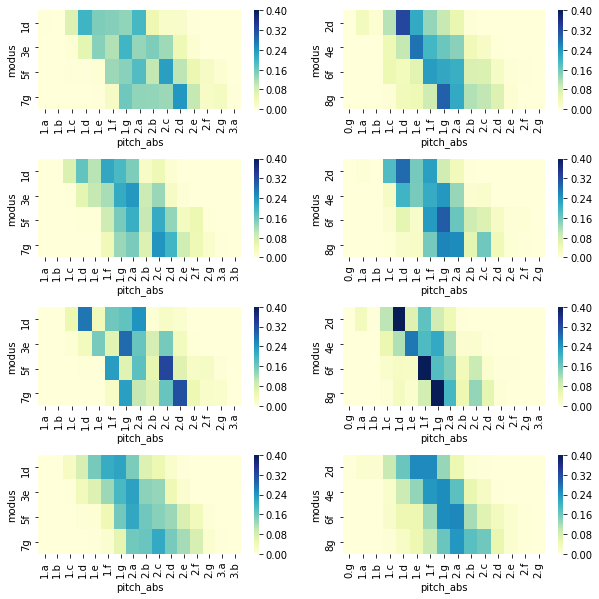

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.cubehelix_palette(rot = .5, as_cmap=True, dark=1, light=0)
def heatmap(syllfunc, modes, ax):
    df = lmlo.query(f'syll_func == "{syllfunc}" and modus in {modes}')
    return sns.heatmap(pd.crosstab(df.modus, df.pitch_abs, margins=False, normalize='index'), cmap='YlGnBu', ax=ax, vmin=0, vmax=.4)

fig, axn = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(10,10))
plt.subplots_adjust(hspace=.5)
heatmap('final', chant.modesMainAuth, axn[0][0])
heatmap('initial', chant.modesMainAuth, axn[1][0])
heatmap('punctal', chant.modesMainAuth, axn[2][0])
heatmap('medial', chant.modesMainAuth, axn[3][0])
heatmap('final', chant.modesMainPlag, axn[0][1])
heatmap('initial', chant.modesMainPlag, axn[1][1])
heatmap('punctal', chant.modesMainPlag, axn[2][1])
heatmap('medial', chant.modesMainPlag, axn[3][1])


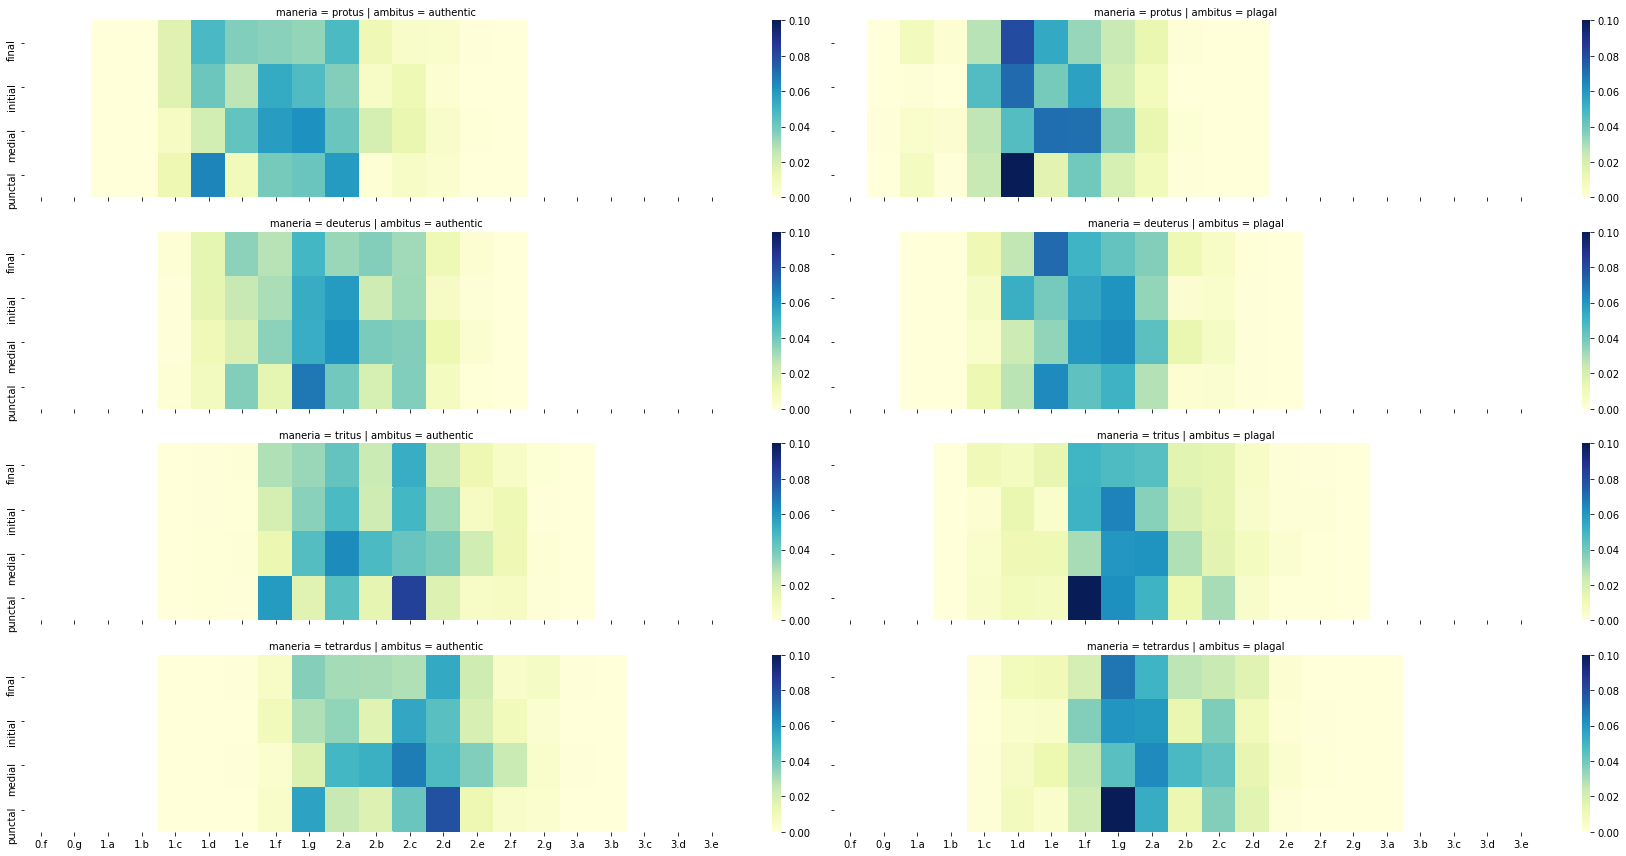

In [260]:
df = lmlo.query(f'Modus in {chant.modesMain}')
g = sns.FacetGrid(df,row="maneria",col="ambitus",aspect=4)
def _facet (data, color):
    ct = pd.crosstab(data.syll_func, data.pitch_abs, margins=False, normalize=True).reindex(columns=gamut_pitches)
    return sns.heatmap(ct, cmap='YlGnBu', vmin=0, vmax=.1)
g.map_dataframe(_facet)


[Text(334.32561983471066, 0.5, 'medial')]

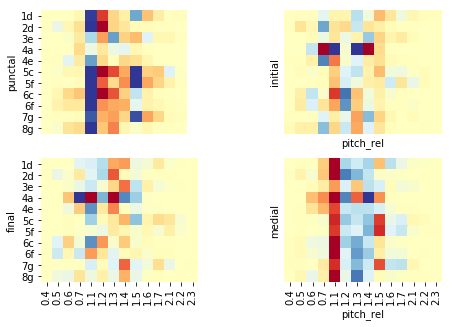

In [316]:
fig, ax = plt.subplots(2,2,figsize=(8,5))
df1 = lmlo.query(f'Modus in {chant.modesMore}')
df2 = df1.query(f'syll_func == "punctal"')
ct1 = pd.crosstab(df1.modus, df1.pitch_rel, normalize='index')
ct2 = pd.crosstab(df2.modus, df2.pitch_rel, normalize='index')
sns.heatmap(ct2-ct1, cmap="RdYlBu", vmax=.1, vmin=-.1, ax=ax[0,0], square=True, xticklabels=False, cbar=False)
df2 = df1.query(f'syll_func == "initial"')
ct2 = pd.crosstab(df2.modus, df2.pitch_rel, normalize='index')
sns.heatmap(ct2-ct1, cmap="RdYlBu", vmax=.1, vmin=-.1, ax=ax[0,1], square=True, xticklabels=False, yticklabels=False, cbar=False)
df2 = df1.query(f'syll_func == "final"')
ct2 = pd.crosstab(df2.modus, df2.pitch_rel, normalize='index')
sns.heatmap(ct2-ct1, cmap="RdYlBu", vmax=.1, vmin=-.1, ax=ax[1,0], square=True, cbar=False)
df2 = df1.query(f'syll_func == "medial"')
ct2 = pd.crosstab(df2.modus, df2.pitch_rel, normalize='index')
sns.heatmap(ct2-ct1, cmap="RdYlBu", vmax=.1, vmin=-.1, ax=ax[1,1], square=True, yticklabels=False, cbar=False)
ax[0,0].set(xlabel='', ylabel='punctal')
ax[0,1].set(ylabel='initial')
ax[1,0].set(xlabel='', ylabel='final')
ax[1,1].set(ylabel='medial')


In [478]:
def pitch_profile(pitch, pitch_type):
    df1 = lmlo.query(f'pitch_{pitch_type} == "{pitch}" and Modus in {chant.modesMain}')
    print(pd.crosstab(df1.modus, df1.syll_func, normalize='index'))
    ct1 = pd.crosstab(df1.modus, df1.rint, normalize='index')
    fig, ax = plt.subplots(2,2,figsize=(10,5))
    axes = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
    sf = ['punctal','initial','final','medial']
    for i in range(4):
        df2 = df1.query(f'syll_func == "{sf[i]}"')
        ct2 = pd.crosstab(df2.modus, df2.rint, normalize='index').reindex(columns = range(-7, 7))
        ct = ct2-ct1
    #     limit = max(abs(ct.values.max()), abs(ct.values.min()))
        sns.heatmap(ct, cmap="RdYlBu", vmin=-.5,vmax=.5, ax=axes[i], square=True)
        axes[i].set(ylabel=sf[i])
        print(f'{len(df2)}/{len(df1)}')# display(ct1)
    # display(ct2)


syll_func     final   initial    medial   punctal
modus                                            
1d         0.292938  0.149153  0.509322  0.048588
2d         0.310127  0.082278  0.487342  0.120253
3e         0.313162  0.193394  0.324508  0.168936
4e         0.364750  0.102733  0.444863  0.087653
5f         0.215919  0.208683  0.438205  0.137192
6f         0.209169  0.249284  0.375931  0.165616
7g         0.261700  0.140592  0.443935  0.153773
8g         0.261269  0.137937  0.472953  0.127840
3231/24706
4074/24706
6645/24706
10756/24706
syll_func     final   initial    medial   punctal
modus                                            
1d         0.317660  0.229120  0.369026  0.084194
2d         0.301786  0.217800  0.392040  0.088374
3e         0.304459  0.213224  0.164787  0.317529
4e         0.343073  0.188501  0.163458  0.304968
5f         0.348148  0.185185  0.355556  0.111111
6f         0.381182  0.117008  0.297949  0.203860
7g         0.386667  0.146667  0.320000  0.146667
8g   

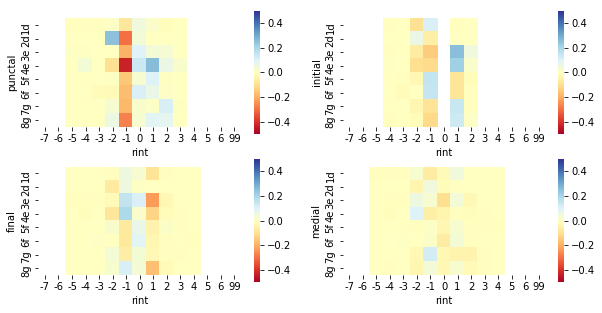

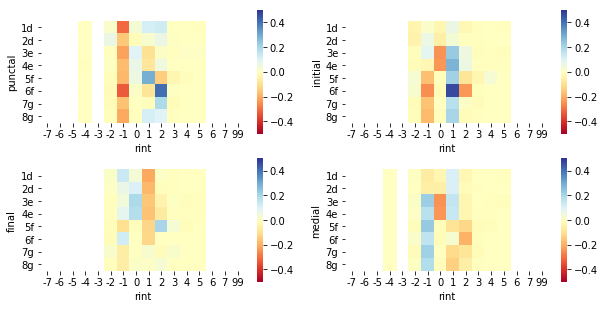

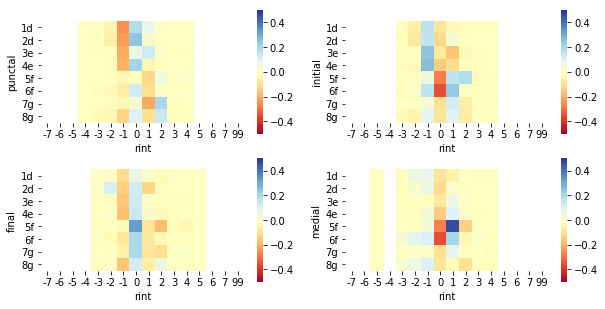

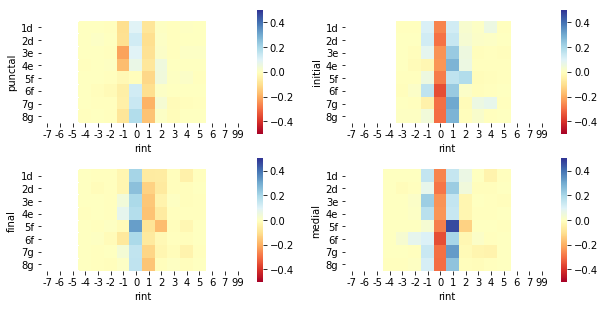

In [481]:
pitch_profile('2.b','abs')
pitch_profile('1.e','abs')
pitch_profile('1.f','abs')
pitch_profile('1.1','rel')


Leaping down is least likely from an initial position, roughly equally likely from other syllabic positions.
Leaping up is least likely from a medial position, most likely from initial/punctal positions.

syll_func,final,initial,medial,punctal,All
rint,,,,,
-5,0.000259,0.000000,0.000067,0.000359,0.000168
-4,0.004463,0.001215,0.003251,0.007036,0.003977
-3,0.011337,0.003815,0.010079,0.010986,0.009113
-2,0.070919,0.037138,0.076217,0.051458,0.059673
-1,0.319679,0.434082,0.472351,0.207258,0.362585
0,0.310056,0.000080,0.000485,0.344258,0.157420
1,0.183021,0.415582,0.365397,0.209655,0.296166
2,0.056803,0.084168,0.059979,0.101130,0.074973
3,0.021707,0.013090,0.009970,0.015587,0.014859


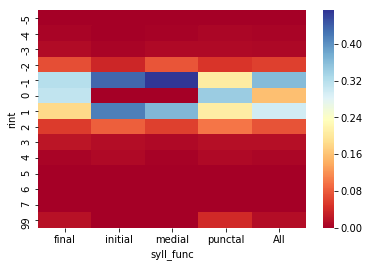

In [410]:
ct = pd.crosstab(lmlo.rint, lmlo.syll_func, normalize='columns', margins=True)
sns.heatmap(ct, cmap="RdYlBu")
ct

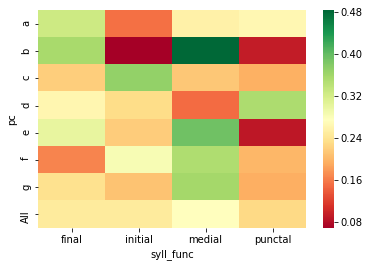

In [160]:
df = lmlo.query(f'modus == "2d"')
sns.heatmap(pd.crosstab(df.pc, df.syll_func, margins=True, normalize='index'), cmap='RdYlGn')

In [455]:
def v2r(v):
  if v == '':
    return v

  numbers = list()
  for vchar in v:
    numbers.append(gamut_volpiano.index(vchar))
  min_n = min(numbers)
  output = '<'
  for i in range(len(numbers)):
    output += f'{numbers[i] - min_n:x}' 
  output += '>'

  return output

from collections import defaultdict, Counter
lmlo_sylldata = defaultdict(list)
bad_words = Counter()
override = dict()
override['eius'] = ['e','ius']
override['dei'] = ['de','i']
override['deus'] = ['de','us']
override['quia'] = ['qui','a']
override['christi'] = ['chris','ti']
override['christe'] = ['chris','te']
override['eum'] = ['e','um']
override['deum'] = ['de','um']
override['meum'] = ['me','um']
override['meus'] = ['me','us']
override['christo'] = ['chris','to']
override['christus'] = ['chris','tus']
override['christum'] = ['chris','tum']
override['mei'] = ['me','i']
override['ei'] = ['e','i']
override['cui'] = ['cu','i']
override['israel'] = ['is','ra','el']
override['sanguine'] = ['san','gui','ne']
override['meis'] = ['me','is']
override['eis'] = ['e','is']
override['fidei'] = ['fi','de','i']
override['sanguinem'] = ['san','gui','nem']
override['lingua'] = ['lin','gua']
override['thronum'] = ['thro','num']
override['pulchra'] = ['pul','chra']
override['oleum'] = ['o','le','um']
override['adiutor'] = ['ad','iu','tor']
override['sanguis'] = ['san','guis']
override['sanguinis'] = ['san','gui','nis']
override['huic'] = ['hu','ic']
override['alleluia'] = ['al','le','lu','ia']
override['michael'] = ['mi','cha','el']
override['noe'] = ['no','e']

for i, c in chant.cd.iterrows():
  # if i>200: break
  words = c.text.lower().split()
  vwords = c.volpiano[4:-3].split('--')
  if len(words) != len(vwords):
    # print(f'oops: {len(words)} {len(vwords)}')
    # print(words)
    # print(vwords)    
    vwords[-2] = vwords[-2] + '-' + vwords[-1]
    vwords.pop(-1)
    # print('--fixing--')
    # print(words)
    # print(vwords)
  for j in range(len(words)):
    if words[j] in override:
      sylls = override[words[j]]
    else:
      sylls = syllabifier.syllabify(words[j].lower())
    vsylls = vwords[j].split('-')
    if len(sylls) != len(vsylls):
      sylls = [f'[{words[j]}]'] * len(vsylls)
    for k in range(len(vsylls)):
      lmlo_sylldata['chantID'].append(c.chantID)
      lmlo_sylldata['syllable'].append(sylls[k])
      lmlo_sylldata['last_syll'].append(k+1 == len(vsylls))
      v = vsylls[k]
      lmlo_sylldata['n_notes'].append(len(v))
      lmlo_sylldata['volpiano'].append(v)
      notes = ''
      for vchar in v:
        notes += f'{gamut_pitches[gamut_volpiano.index(vchar)]} '
      lmlo_sylldata['notes'].append(notes)
      lmlo_sylldata['finalpitch'].append(gamut_pitches[gamut_volpiano.index(v[-1])])
      lmlo_sylldata['initialpitch'].append(gamut_pitches[gamut_volpiano.index(v[0])])
      lmlo_sylldata['t_type'].append(v2r(v))
      lmlo_sylldata['e_type'].append(v2r(v[0]+v[-1]))

lmlo_sylldata = pd.DataFrame(lmlo_sylldata)
lmlo_sylldata = lmlo_sylldata.join(chant.cd.modus, on='chantID')



In [457]:
results = pd.DataFrame(index=gamut_pitches)
for m in chant.modesMain:
    df = lmlo_sylldata.query(f'modus == "{m}" and n_notes > 0')
#     print(m, df)
    # pd.crosstab(df.initialpitch, df.finalpitch, margins=True)
    df2 = df['initialpitch'].value_counts().to_frame()
#     print(df2)
    df2['finalpitch'] = df['finalpitch'].value_counts()
    results[f'ratio_{m}'] = df2['finalpitch']/df2['initialpitch']
results.sort_index(ascending=False)

,ratio_1d,ratio_2d,ratio_3e,ratio_4e,ratio_5f,ratio_6f,ratio_7g,ratio_8g
3.e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.a,NaN,NaN,NaN,NaN,1.500000,NaN,1.370370,1.000000
2.g,NaN,NaN,NaN,NaN,1.691176,1.000000,1.461095,1.333333
2.f,7.000000,NaN,0.500000,NaN,0.715474,0.600000,0.700000,0.688889
2.e,3.700000,NaN,1.443038,1.666667,1.360190,0.980769,1.092096,1.103627
2.d,1.368132,1.000000,1.315789,1.421053,0.862242,1.037975,1.073943,1.272727
2.c,0.660169,0.714286,0.991482,1.178182,1.027277,1.014019,0.734026,0.818357


In [461]:
df = lmlo_sylldata.query('modus == "1d" and finalpitch=="1.e"')
df['notes'].value_counts().to_frame().


,notes
1.f 1.e,1947
1.e,878
1.e 1.f 1.e,275
1.d 1.e,272
1.g 1.f 1.e,145
1.f 1.g 1.f 1.e,98
1.g 1.e,68
2.a 1.g 1.e,40
1.d 1.e 1.f 1.e 1.d 1.e,37
1.d 1.f 1.e,37


# Exploring `e_type`

Two-note syllables are more likely to be descending if stepwise, and more likely to ascend if leaping.

Three-, five-, and seven-note syllables are most likely to have an e_type of <02> or <20>. For the rest it's <01> or <10>. 

* This makes sense in the three-note case: fill in the third.

* Five notes: the vast majority are stepwise elaborations, which "naturally" have an odd number of notes. The main exception is t-type <01312>, which is probably on G-b and possibly on F-a or c-e, and which is modally unspecific. 

In [4]:
df = lmlo_sylldata
pd.crosstab(df.n_notes, df.e_type)

e_type,<00>,<01>,<02>,<03>,<04>,<05>,<06>,<07>,<10>,<20>,<30>,<40>,<50>,<60>,<70>
n_notes,,,,,,,,,,,,,,,
1,103036,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,22609,3971,723,597,0,0,0,28133,1814,210,56,1,0,0
3,5082,961,3601,833,264,222,20,0,918,5071,664,34,0,0,0
4,907,1865,389,741,377,130,10,0,2587,552,1077,53,1,0,0
5,1280,365,1123,168,108,10,10,0,445,1119,278,276,12,2,0
6,481,1384,185,181,62,9,2,3,960,439,212,114,33,0,0
7,665,165,299,82,43,12,3,2,334,338,162,152,21,1,0
8,300,171,47,28,27,10,6,0,276,194,132,41,26,3,0
9,125,182,59,60,19,11,8,0,115,75,41,66,5,1,1


In [5]:
df = lmlo_sylldata.query('n_notes == 7')
display(pd.crosstab(df.t_type, df.e_type).sort_values('<02>', ascending=False).head(10))
display(pd.crosstab(df.t_type, df.e_type).sort_values('<20>', ascending=False).head(10))


e_type,<00>,<01>,<02>,<03>,<04>,<05>,<06>,<07>,<10>,<20>,<30>,<40>,<50>,<60>
t_type,,,,,,,,,,,,,,
<0121232>,0,0,121,0,0,0,0,0,0,0,0,0,0,0
<0123212>,0,0,38,0,0,0,0,0,0,0,0,0,0,0
<1012123>,0,0,33,0,0,0,0,0,0,0,0,0,0,0
<2103234>,0,0,23,0,0,0,0,0,0,0,0,0,0,0
<1210123>,0,0,14,0,0,0,0,0,0,0,0,0,0,0
<1012323>,0,0,9,0,0,0,0,0,0,0,0,0,0,0
<0131232>,0,0,6,0,0,0,0,0,0,0,0,0,0,0
<0121012>,0,0,4,0,0,0,0,0,0,0,0,0,0,0
<0245432>,0,0,4,0,0,0,0,0,0,0,0,0,0,0


e_type,<00>,<01>,<02>,<03>,<04>,<05>,<06>,<07>,<10>,<20>,<30>,<40>,<50>,<60>
t_type,,,,,,,,,,,,,,
<3212101>,0,0,0,0,0,0,0,0,0,63,0,0,0,0
<2121010>,0,0,0,0,0,0,0,0,0,58,0,0,0,0
<2343210>,0,0,0,0,0,0,0,0,0,30,0,0,0,0
<2323210>,0,0,0,0,0,0,0,0,0,16,0,0,0,0
<2123210>,0,0,0,0,0,0,0,0,0,15,0,0,0,0
<3210121>,0,0,0,0,0,0,0,0,0,15,0,0,0,0
<2132120>,0,0,0,0,0,0,0,0,0,14,0,0,0,0
<2321010>,0,0,0,0,0,0,0,0,0,13,0,0,0,0
<4321012>,0,0,0,0,0,0,0,0,0,12,0,0,0,0


In [4]:
df = lmlo_sylldata.query('e_type == "<01>"')
pd.crosstab(df.t_type, df.finalpitch, margins = True).query('All>20').sort_values('All')

finalpitch,1a,1b,1c,1d,1e,1f,1g,2a,2b,2c,2d,2e,2f,2g,3a,3b,3c,All
t_type,,,,,,,,,,,,,,,,,,
<01321>,0,0,0,4,0,0,0,12,0,0,7,0,0,0,0,0,0,23
<0131>,0,0,0,2,0,0,1,17,0,0,2,1,0,0,0,0,0,23
<0231>,0,0,0,18,0,0,1,4,0,0,2,0,0,0,0,0,0,25
<210123>,0,0,0,0,0,6,6,0,1,8,6,0,0,1,0,0,0,28
<21012123>,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,32
<0123121>,0,0,0,0,0,0,32,0,0,0,1,0,0,0,0,0,0,33
<2103>,0,0,0,0,0,5,11,0,0,11,4,0,1,2,0,0,0,34
<010121>,0,0,0,0,0,0,3,21,0,0,2,13,0,0,0,0,0,39
<02101>,0,0,0,0,6,3,5,10,15,1,0,1,0,0,0,0,0,41


In [51]:
# tops = list(lmlo_sylldata.query('modus=="4e"').notes.value_counts()[:50].index)
# print(tops)
# df = lmlo_sylldata.query(f'notes in {tops}')

df = lmlo_sylldata.query('t_type == "<01312>"')
pd.crosstab(df.notes, df.modus)

modus,1d,2d,3e,4e,5f,6c,7g,8g
notes,,,,,,,,
1f 1g 2b 1g 2a,3,0,1,0,0,0,0,1
1g 2a 2c 2a 2b,32,8,16,8,22,16,14,15
2c 2d 2f 2d 2e,3,0,4,0,1,2,0,0


In [7]:
from scipy.stats import entropy
df = lmlo_sylldata.query('t_type == "<024>"')
np.e ** entropy(df.notes.value_counts())


2.4321733957991087

In [33]:
lmlo_sylldata.notes.value_counts().to_frame()

,notes
1g,21364
2a,16626
1f,14863
2c,14512
1d,12375
2d,7513
1g 2a,6554
2a 1g,5696
1e,5405
1f 1e,5205


In [45]:
mode_PP = defaultdict(list)
for i, row in lmlo_sylldata.notes.value_counts().to_frame().iterrows():
    mode_PP['notes'].append(row.name)
    mode_PP['count'].append(row.notes)
    df = lmlo_sylldata.query(f'notes == "{row.name}"')
    mode_PP['mode_PP'].append(np.e ** entropy(df.modus.value_counts()))
mode_PP = pd.DataFrame(mode_PP)
mode_PP

,notes,count,mode_PP
0,1g,21364,7.045263
1,2a,16626,7.065761
2,1f,14863,7.184837
3,2c,14512,7.052080
4,1d,12375,6.931890
5,2d,7513,7.205160
6,1g 2a,6554,7.070337
7,2a 1g,5696,6.958662
8,1e,5405,7.065594
9,1f 1e,5205,6.896519


In [47]:
pitch_PP = defaultdict(list)
for i, row in lmlo_sylldata.t_type.value_counts().to_frame().iterrows():
    pitch_PP['t_type'].append(row.name)
    pitch_PP['count'].append(row.t_type)
    df = lmlo_sylldata.query(f't_type == "{row.name}"')
    pitch_PP['pitch_PP'].append(np.e ** entropy(df.notes.value_counts()))
pitch_PP = pd.DataFrame(pitch_PP)
pitch_PP

,t_type,count,pitch_PP
0,<0>,103036,8.782275
1,<10>,28133,8.688355
2,<01>,22609,8.084884
3,<210>,5033,8.659999
4,<02>,3971,4.815701
5,<010>,3798,6.839823
6,<012>,3235,7.522725
7,<20>,1814,8.034392
8,<1210>,1248,7.491256
9,<0121>,1148,7.771911


In [91]:
mode_PP.query('notes == "1g 2a 2c 2a 2b "')

,notes,count,mode_PP
105,1g 2a 2c 2a 2b,131,7.287271


In [116]:
mode_PP.query('count > 25').sort_values('mode_PP')

,notes,count,mode_PP
306,2a 1f 1g 2a,28,3.184699
273,1f 1g 1f 1d,34,3.764640
309,2c 2d 2e 2f 2e,28,3.792770
254,1f 1c,37,4.124243
219,2c 2a 2b 2c 2b 2a 1g 2a,46,4.357447
264,2c 2e 2g,35,4.406581
233,1f 1e 1f 1g 1f 1g,42,4.452623
257,2a 2c 1g 2a,36,4.462161
270,1g 2a 1g 1f 1g 2a,34,4.487529
334,1f 1g 2a 1g 1f,26,4.502273


In [106]:
pitch_PP.query('count > 50').sort_values('pitch_PP')

,t_type,count,pitch_PP
100,<2123232010>,53,1.000000
68,<013212321>,98,1.000000
57,<02123210>,126,1.047376
77,<1241210>,87,1.064771
54,<3432321010>,133,1.164062
98,<023121>,57,1.289291
60,<321023>,118,1.430695
53,<01312>,146,1.486548
51,<1232101210>,147,1.552889
93,<320121>,59,1.582004


In [323]:
lmlo_sylldata.query('finalpitch == "2b"')['notes'].value_counts().to_frame()

,notes
2b,3621
2c 2b,3162
2a 2b,1446
2d 2c 2b,259
2c 2d 2c 2b,253
1g 2c 2b,195
1d 2a 2b,195
1g 2a 2b,175
2d 2b,175
1f 1g 2a 2b,171


In [124]:
lmlo_sylldata.query('notes == "2a 1g 2a 1g 1f 1e 1d "').sort_values(['finalpitch','modus'])

,chantID,syllable,last_syll,n_notes,volpiano,notes,finalpitch,t_type,e_type,modus,genre
25641,729,lanx,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,R
25661,729,mi,False,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,R
25678,730,lis,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V
27280,781,hoc,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V
67268,1857,bim,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V
67286,1857,quo,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V
72996,2016,as,False,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,R
73031,2016,o,False,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,R
73054,2017,nem,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V
85114,2375,hoc,True,7,hghgfed,2a 1g 2a 1g 1f 1e 1d,1d,<4343210>,<40>,1d,V


In [126]:
chant.fullGenre['V']

'responsory Vx'